# Jupyter Data Science Workflow
## From exploratoray analysis to reproducible science
### Tutorial by: Jake Vanderplas
*A.N. Notes*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from jnoteworkflow.data import get_Fremont_data

In [3]:
data = get_Fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


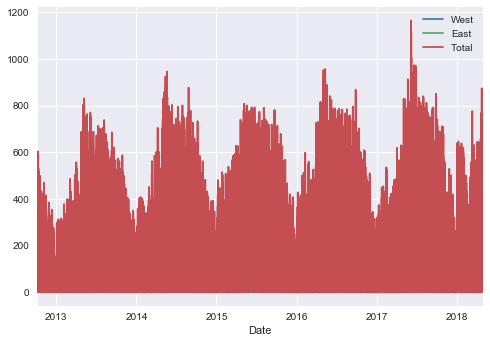

In [4]:
# pands way of plotting
data.plot()

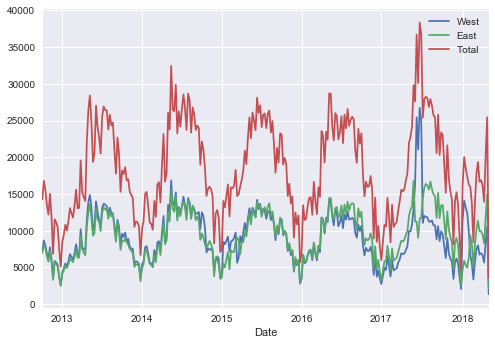

In [5]:
data.resample('W').sum().plot()

(0, 1114778.25)

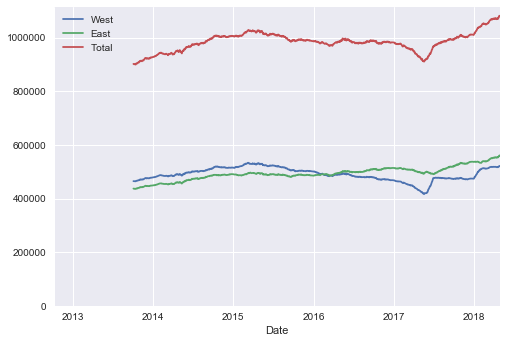

In [6]:
# # let's identify the annual trend
# rolling sum over 365 days:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) # None to use the current max in y

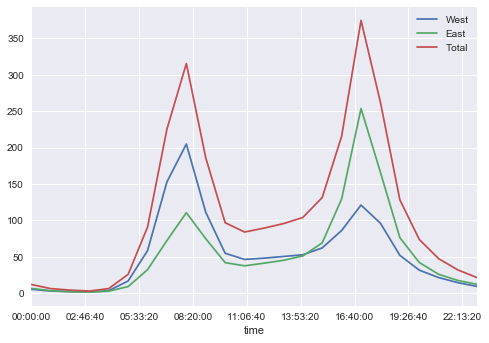

In [7]:
# let's look into trends within each day
data.groupby(data.index.time).mean().plot()

In [8]:
# let's see the whole dataset in this way (no averages)
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


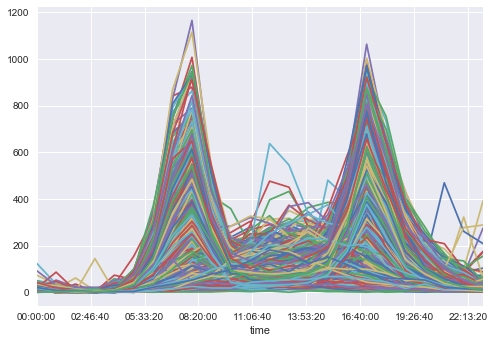

In [9]:
# plot these without legends
pivoted.plot(legend=False)

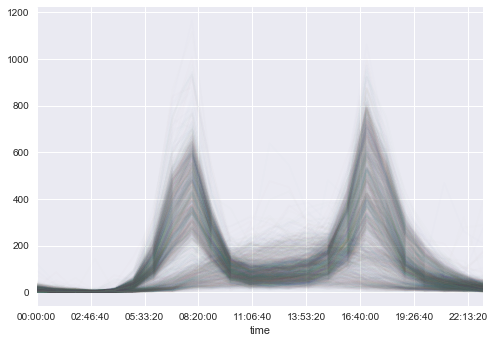

In [10]:
# it is generally hard to see so let's change the transparancy
pivoted.plot(legend=False, alpha=0.01)

### now save it
### to make sure everything works just: Kernel: "Restart & Run All"

## use github
1. sign in to github
2. make a repository in github as "JupyterWorkflow"
3. on your machine file up git
4. git clone "address from clone or download"
5. mv jupyterWorkflow.ipynb JupyterWorkflow/
6. git add jupyterWorkflow.ipynb
7. git commit -m "Add initial analysis notebook"
8. git push origin master
now 

now you have a local repository that you can monitor your code within the notebook and an online version that can be cloned or push the changes into cloud!

### N.B. 
Add data (e.g. Fremont.csv here) to .gitignore and update/push to make sure the data is not commited to repo.

### increase reproducibility
now the code is organized in a way that it only read data if not exist
plus the main libs and style files are added at the beginning of script

### make function as package
we have a function in the previous version. If we wanted to use this function in other notebooks, it is a good idea to make it as a package and import it instead of copying over to other notebooks. In this way you could start building tools that others can actually use it.  
"**>>> mkdir jnoteworkflow**"
the way you turn a directory to a package is to make a file called "**\__init\__.py**"
for instance if you save "**x=5.67**" in this file, when you run "**>>>ipython**" you can add "**import jnoteworkflow**". This enables us to have access to "*x*" value from: "**jnoteworkflow.x**" 
In other words, anything that is in "**\__init\__.py**" can be available when you import the package.


Then, in order to make the function as package:
1. make file data.py in jnoteworkflow directory
2. copy and paste the function in it
3. call the function via: from jnoteworkflow.data import get_Fremont_data as is done in above.

so "get_Fremont_data?" shows the documentation of the function
and "get_Fremont_data??" shows the source code
and "get_Fremont_data(|)" while applying tab in the paranthesis shows the input parameteres for this function

remember to ad